Redes neurais artificiais
=========================



## Introdução



Nossa classe `Valor` já faz tudo que precisamos para usarmos ela como suporte para construirmos uma rede neural. Neste notebook iremos construir uma rede neural por partes, primeiramente criando um neurônio artificial, depois uma camada de neurônios e, por fim, uma rede neural multicamadas.



## Objetivo



Criar uma rede neural artificial usando Python.



## Importações



In [1]:
import random
from classes import Valor
from funcoes import plota_grafo

## Código e discussão



### O neurônio artificial



Vamos construir um neurônio artificial. Como iremos ter vários neurônios em uma rede neural, podemos construir uma classe que servirá de receita para criar esses neurônios. Lembre-se que um neurônio artificial recebe informação de sinapses artificiais ponderadas, soma estas informações, adiciona um viés à esta soma, aplica uma função de ativação e, finalmente, passa a informação adiante.



In [2]:
class Neuronio: #classe é uma forma de criar estruturas complexas!
    def __init__(self, num_dados_entrada):
        pesos = []

        for _ in range(num_dados_entrada):
            peso = Valor(random.uniform(-1, 1)) #forma usual de iniciar os pesos. há discussões sobre a distribuição do random usar
            pesos.append(peso)

        self.pesos = pesos
        self.vies = Valor(random.uniform(-1, 1)) #criação de viés. pesos e viés diferentes, naurônios diferentes

    def __call__(self, x):
        """Executa a computação interna do neurônio.

        Args:
          x: lista de valores de entrada (informação que chega ao neurônio).

        Returns:
          Informação que o neurônio propaga adiante. Trata-se da
          aplicação da função de ativação à soma de `x` vezes os pesos do
          neurônio adicionado ao viés.
        """
        assert len(x) == len(self.pesos), "Seu x tem tamanho errado."
        
        soma = 0
        for x_, p in zip(x, self.pesos): #x_ é uma notação para utilizar em caso de variavel for == variavel
            soma = soma + x_ * p
            
        soma = soma + self.vies        
        dado_de_saida = soma.sig()                
        return dado_de_saida

Vamos fazer um teste simples do nosso neurônio artificial.



In [3]:
dados_de_entrada = [2.5, 4.25]

meu_neuronio = Neuronio(len(dados_de_entrada)) #coloca a instância em uma variável. Instanciar é rodar o init.

print(meu_neuronio(dados_de_entrada)) #call ocorre quando se chama a variável 'meu_neuronio'
#nota: há a incorporação dos pesos dos inputs ao neurônio. conceitualmente, isso não acontece. o que ocorre é que essa estrutura é mais fácil
#'Hello, World!', Perceptron!
#Como que eu faço toda a primeira 'run' da instância me entregar 'Hello, World!'?

Valor(data=0.23843669827376404)


### A camada de neurônios



Uma rede neural artificial com apenas um neurônio é um modelo relativamente simples. As redes neurais artificias costumam ser mais interessantes com mais neurônios. O motivo para isso é que com mais neurônios nós conseguimos identificar padrões mais complexos nos dados na tentativa de induzir um modelo preditivo melhor.

Uma estrutura de organização de neurônios artificiais são as `camadas de neurônios`. Uma camada de neurônio é um conjunto de neurônios onde cada neurônio é independente (tem seu próprio conjunto de pesos e viés), porém recebe a mesma informação. A quantidade de informação recebida estará representada no argumento `num_dados_entrada` abaixo. Assim como o neurônio artificial, uma camada de neurônios será modelada usando uma classe.



In [4]:
class Camada: #remember: feedforward network!
#A Feed Forward Neural Network is an artificial neural network in which the connections between nodes does not form a cycle. The opposite of a feed forward neural network is a recurrent neural network, in which certain pathways are cycled.
    def __init__(self, num_dados_entrada, num_neuronios):
        neuronios = []

        for _ in range(num_neuronios):
            neuronio = Neuronio(num_dados_entrada)
            neuronios.append(neuronio)

        self.neuronios = neuronios

    def __call__(self, x): #chamar a camada == executar cada neurônio.
        """Executa a computação de cada neurônio da camada.

        Args:
          x: lista de valores de entrada (informação que chega aos neurônios).

        Returns:
          Informação que os neurônios da camada propagam adiante.
        """
        saidas = []

        for neuronio in self.neuronios:
            informacao = neuronio(x) #valor do neuronio
            saidas.append(informacao) #armazena a informação propagada

        if len(saidas) == 1:
            return saidas[0] #arranca da lista
        else:
            return saidas

Vamos fazer um teste simples da nossa camada de neurônios artificiais.



In [5]:
dados_de_entrada = [2.5, 4.25]
num_neuronios = 3

minha_camada = Camada(len(dados_de_entrada), num_neuronios)

print(minha_camada(dados_de_entrada))

[Valor(data=0.013546230666780278), Valor(data=0.41968206083954707), Valor(data=0.6405530463087049)]


### A rede neural Multilayer Perceptron (MLP)



Uma rede neural artificial composta de uma ou mais camadas ocultas de neurônios (isto é, camadas que não sejam camadas de entrada ou camadas de saída) é chamada de Multilayer Perceptron ou simplesmente `MLP`.

A informação em uma rede MLP flui da esquerda para a direita, iniciando na camada de entrada, passando por todas as camadas ocultas (uma a uma, na ordem) e saindo na camada de saída. A informação em uma MLP nunca retorna, apenas segue em frente. Por conta disso, MLPs também são chamadas de `feedforward networks`, ou seja, redes neurais que sempre propagam &ldquo;para frente&rdquo; a informação. Existem outros tipos de redes neurais que não são `feedforward`, porém estas não serão vistas neste curso.

Como você provavelmente já estava esperando, usaremos uma classe para servir como receita para criar nossas redes MLP.



In [6]:
class MLP:
    def __init__(self, num_dados_entrada, num_neuronios_por_camada):
        #nota: o num_neuronios_por_camda é uma lista que contém a quantidade de neuronios
        #a 'camada' de input não conta, 'num_dados_entrada' já a conta.


        percurso = [num_dados_entrada] + num_neuronios_por_camada
        camadas = []

        for i in range(len(num_neuronios_por_camada)): #valor do neuronio
            camada = Camada(percurso[i], percurso[i+1]) #lista de neuronios
            camadas.append(camada)

        self.camadas = camadas #transforma em propriedade

    def __call__(self, x): #chamar a camada == executar cada neurônio.
        """Executa a computação de cada camada.

        Como a rede MLP é uma rede feedforward, a informação que uma camada
        recebe é a informação de saída da camada anterior. A única exceção é a
        camada de entrada, onde a informação é fornecida pelo usuário

        Args:
          x: informação fornecida na camada de entrada.

        Returns:
          Informação recuperada na camada de saída.
        """
        for camada in self.camadas: 
            x = camada(x)
        return x

Vamos fazer um teste simples da nossa rede MLP.



In [7]:
dados_de_entrada = [2.5, 4.25]
num_neuronios_por_camada = [3, 2, 1]

minha_mlp = MLP(len(dados_de_entrada), num_neuronios_por_camada)

resultado = minha_mlp(dados_de_entrada)

print(resultado)

Valor(data=0.4250776822166607)


Observe que nosso `resultado` é uma instância da classe `Valor`! O que nós podemos fazer com instâncias desta classe? Sim, podemos computar o gradiente local usando nosso algoritmo de `autograd` e plotar o grafo computacional!!



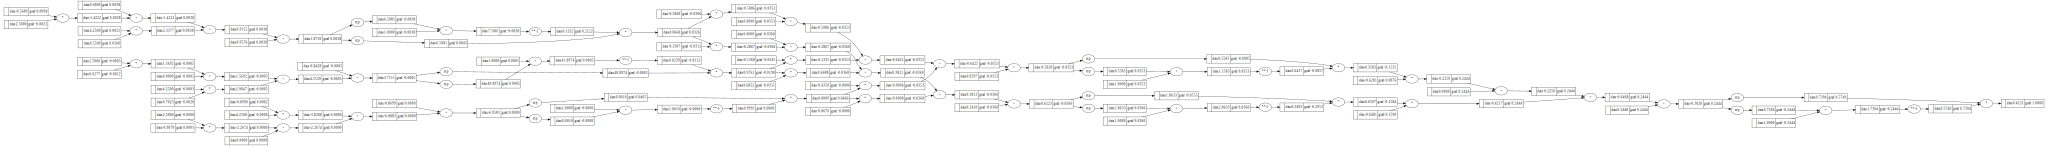

In [8]:
resultado.propagar_tudo()
grafo = plota_grafo(resultado)

# para salvar o grafo
grafo.render("rede_neural", format="png")

grafo

## Conclusão



Este notebook tem objetivo de introduzir a construção básica de redes neurais e computá-las com _backwards propagation_. Para tal, foi-se importado a Classe Valor (construída anteriormente, possui as operações matemáticas necessárias para calcular o backwards propagation) e construído três Classes (Neuronio, Camada e MLP) que contém os dados e funções para computar a rede neural, de modo a computar Neurônios, Camadas e a própria rede. Nota-se que a rede é uma MLP (Multilayer Perceptron), ou seja, uma rede neural de uma ou mais camadas ocultas. É interessante frisar que na Classe Nerônios (que computa neurônios da rede neural) possui os pesos e a função intrínseco ao código. Conceitualmente isso é errôneo, uma vez que os pesos estão, teoricamente, nas sinapses e se pode alterar a função de ativação (nesse caso, está 'travado' na sigmoidal, dado como foi programado os neuronios. Em geral, estabelece-se uma função de ativação por camada e não por neurônio. Enteranto, como todos são da mesma função, pode-se considerar que são os mesmos por camada). Escolheu-se realizar dessa forma pois a estruturação de dados é facilitada. Por fim, consegiu-se computar a rede neural com _backwards propagation_ (o que implica na presença de cálculo do gradiente).

## Playground

